# **Submission 1**

**Team Ihre einzige grenze ist ihr verstand**

## 🔹 1. Load Dataset & Mapping Label

In [1]:
import pandas as pd

# Load dataset
submission = pd.read_csv("data/submission_2.csv")  # id, predicted
ground_truth = pd.read_csv("data/pred_datatest.csv")  # id, text, label

# Mapping angka ke label
label_map = {
    0: "Proud",
    1: "Trust",
    2: "Joy",
    3: "Surprise",
    4: "Neutral",
    5: "Sadness",
    6: "Fear",
    7: "Anger",
}

# Tambahkan kolom label teks pada submission
submission["predicted_label"] = submission["predicted"].map(label_map)

submission.head()

,id,predicted,predicted_label
0,1,3,Surprise
1,2,3,Surprise
2,3,3,Surprise
3,4,3,Surprise
4,5,3,Surprise


## 🔹 2. Analisis Distribusi Prediksi

Distribusi Prediksi:
predicted_label
Surprise    104
Trust        48
Proud        27
Joy          14
Anger         4
Sadness       3
Name: count, dtype: int64


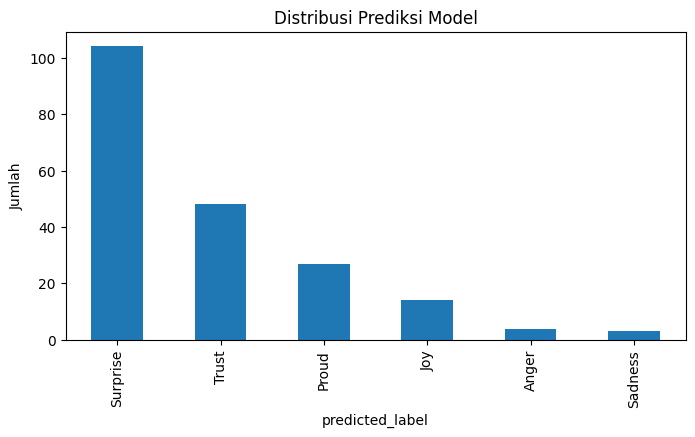

In [2]:
import matplotlib.pyplot as plt

# Distribusi prediksi
dist_pred = submission["predicted_label"].value_counts()

print("Distribusi Prediksi:")
print(dist_pred)

# Visualisasi
dist_pred.plot(kind="bar", figsize=(8,4), title="Distribusi Prediksi Model")
plt.ylabel("Jumlah")
plt.show()

## 🔹 3. Gabungkan dengan Ground Truth

In [3]:
# Merge berdasarkan id
merged = pd.merge(ground_truth, submission, on="id")

# Cek data
merged[["id", "text", "label", "predicted_label"]].head()

,id,text,label,predicted_label
0,1,kali ini ya di sebelah saya sudah ada baik BG4...,Proud,Joy
1,2,di gias ada Honda Civic ya sudah dimodifikasi ...,Proud,Surprise
2,3,jadi kita udah nyampe di nama tempatnya itu Gu...,Neutral,Neutral
3,4,ini ada tempat yang bisa membuka kazana kok ka...,Neutral,Surprise
4,5,Unboxing give box HP 3 juta yang banyak gaya. ...,Joy,Surprise


## 🔹 4. Classification Report & Macro F1

In [4]:
from sklearn.metrics import classification_report, f1_score

# Hitung classification report
report = classification_report(
    merged["label"], merged["predicted_label"], output_dict=False
)
print(report)

# Hitung Macro-F1
f1_macro = f1_score(merged["label"], merged["predicted_label"], average="macro")
print("Macro F1-Score:", f1_macro)

              precision    recall  f1-score   support

       Anger       0.56      0.28      0.37        18
        Fear       0.00      0.00      0.00         5
         Joy       0.51      0.27      0.35        93
     Neutral       0.17      0.31      0.22        42
       Proud       0.38      0.19      0.25        27
     Sadness       0.00      0.00      0.00         1
    Surprise       0.02      0.50      0.04         2
       Trust       0.33      0.08      0.13        12

    accuracy                           0.25       200
   macro avg       0.25      0.20      0.17       200
weighted avg       0.39      0.25      0.28       200

Macro F1-Score: 0.17062952973950876


c:\Users\harry\anaconda3\envs\analisis-data\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\harry\anaconda3\envs\analisis-data\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\harry\anaconda3\envs\analisis-data\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

## 🔹 5. Confusion Matrix

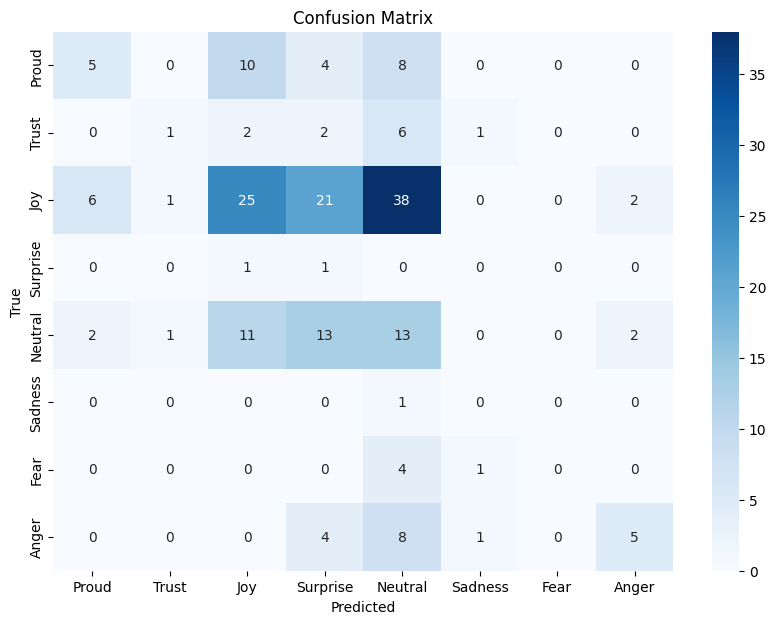

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels = list(label_map.values())

# Buat confusion matrix
cm = confusion_matrix(merged["label"], merged["predicted_label"], labels=labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

## 🔹 6. Insight Otomatis (Opsional)

In [6]:
# Kelas dengan F1 terendah
from sklearn.metrics import classification_report

report_dict = classification_report(
    merged["label"], merged["predicted_label"], output_dict=True
)

sorted_f1 = {cls: report_dict[cls]["f1-score"] for cls in labels if cls in report_dict}
sorted_f1 = dict(sorted(sorted_f1.items(), key=lambda x: x[1]))

print("Urutan performa kelas berdasarkan F1-score:")
for cls, score in sorted_f1.items():
    print(f"{cls}: {score:.3f}")

Urutan performa kelas berdasarkan F1-score:
Sadness: 0.000
Fear: 0.000
Surprise: 0.043
Trust: 0.133
Neutral: 0.217
Proud: 0.250
Joy: 0.352
Anger: 0.370


c:\Users\harry\anaconda3\envs\analisis-data\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\harry\anaconda3\envs\analisis-data\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\harry\anaconda3\envs\analisis-data\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [7]:
import pandas as pd

# Load data overlap (contoh CSV sesuai yang kamu kasih)
overlap = pd.read_csv("data/overlap.csv")

overlap.head()


,id_test,video,video_norm,id_train,emotion_clean
0,59,https://drive.google.com/file/d/1UI8IJ19DQkZuT...,https://drive.google.com/file/d/1ui8ij19dqkzut...,240.0,Surprise
1,61,https://drive.google.com/file/d/1c_1boySTaI5v-...,https://drive.google.com/file/d/1c_1boystai5v-...,260.0,Surprise
2,108,https://drive.google.com/file/d/1PMDBY0C5oekMh...,https://drive.google.com/file/d/1pmdby0c5oekmh...,438.0,Proud
3,109,https://drive.google.com/file/d/1ElvqnnKfMLU8p...,https://drive.google.com/file/d/1elvqnnkfmlu8p...,456.0,Surprise
4,116,https://www.instagram.com/reel/DMh3m5rvW3x/?ut...,https://www.instagram.com/reel/dmh3m5rvw3x,496.0,Surprise


In [8]:
# Total jumlah data overlap
print("Total data overlap:", len(overlap))

# Distribusi berdasarkan label
print("\nDistribusi label overlap:")
print(overlap["emotion_clean"].value_counts())


Total data overlap: 12

Distribusi label overlap:
emotion_clean
Surprise    7
Trust       4
Proud       1
Name: count, dtype: int64


In [9]:
# Buat ringkasan perbandingan
summary = overlap.groupby("emotion_clean").agg(
    total=("emotion_clean", "count"),
    min_id_train=("id_train", "min"),
    max_id_train=("id_train", "max"),
    id_test_list=("id_test", lambda x: list(x))
)

summary


,total,min_id_train,max_id_train,id_test_list
emotion_clean,,,,
Proud,1,438.0,438.0,[108]
Surprise,7,1.0,496.0,"[59, 61, 109, 116, 163, 169, 171]"
Trust,4,12.0,504.0,"[165, 170, 172, 194]"


In [ ]:
# Load data test + prediksi
submission = pd.read_csv("data/submission_1.csv")
ground_truth = pd.read_csv("data/overlap.csv")

# Merge ground truth + prediksi
merged = pd.merge(ground_truth, submission, on="id")

# Ambil hanya data overlap
overlap_eval = merged[merged["id"].isin(overlap["id_test"])]

print("Evaluasi subset overlap:")
print(overlap_eval[["id", "emotion_clean", "predicted"]])


Evaluasi subset overlap:
     id emotion_clean  predicted
0    59      Surprise          4
1    61      Surprise          4
2   108         Proud          4
3   109      Surprise          4
4   116      Surprise          4
5   163      Surprise          4
6   165         Trust          3
7   169      Surprise          7
8   170         Trust          2
9   171      Surprise          3
10  172         Trust          3
11  194         Trust          4
